In [19]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
from numpy import log
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [8]:
df = pd.read_csv('C:\\Users\\I514609\\Documents\\GIT\\stock-price-forecasting\\data\\Stock_Price_BRL 2016-2021.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

C:\Users\I514609\AppData\Local\Temp\ipykernel_21328\1566370484.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('C:\\Users\\I514609\\Documents\\GIT\\stock-price-forecasting\\data\\Stock_Price_BRL 2016-2021.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [9]:
df.head()

,Close_Stock(EUR),Close_EUR,Close_Stock(BRL)
Date,,,
2016-01-04,70.580002,4.2891,302.724687
2016-01-05,71.430000,4.3710,312.220530
2016-01-06,72.050003,4.3301,311.983718
2016-01-07,71.339996,4.3322,309.059131
2016-01-08,71.050003,4.4145,313.650238


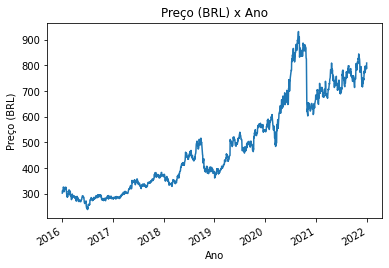

In [10]:
df["Close_Stock(BRL)"].plot()
plt.xlabel('Ano')
plt.ylabel('Preço (BRL)')
plt.title("Preço (BRL) x Ano")
plt.savefig('SAP(BRL) x Ano.png', dpi=300, bbox_inches='tight')
plt.show()

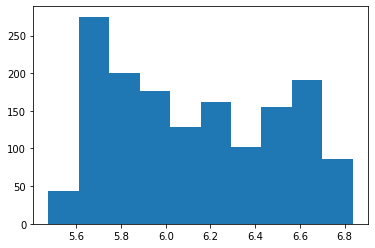

In [18]:
X = df["Close_Stock(BRL)"].values
X = log(X)
plt.hist(X)
plt.savefig('Histograma_SAP(BRL) x Ano.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
#Test Dickey-Fuller
X = df["Close_Stock(BRL)"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.658932
p-value: 0.857102
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [21]:
#Test KPSS
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [22]:
kpss_test(df["Close_Stock(BRL)"].values)

KPSS Statistic: 5.384115219643863
p-value: 0.01
num lags: 25
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\I514609\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:2011: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
